In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.linear_model import Ridge, Lasso
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Generate synthetic data
np.random.seed(42)
X1 = np.random.uniform(-10, 10, 100)
X2 = np.random.uniform(-10, 10, 100)
y = 3 * X1 + 2 * X2 + np.random.normal(0, 3, 100)  # Linear relation with noise

df = pd.DataFrame({'X1': X1, 'X2': X2, 'y': y})
df.head()


,X1,X2,y
0,-2.509198,-9.371416,-28.310500
1,9.014286,2.728208,33.196036
2,4.639879,-3.712880,7.373093
3,1.973170,0.171414,4.119282
4,-6.879627,8.151329,1.261101


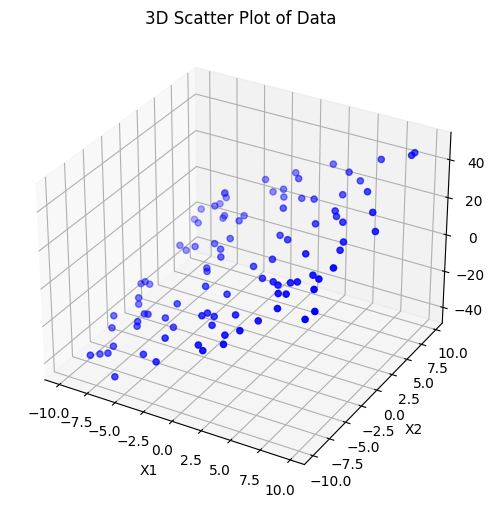

In [2]:
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df['X1'], df['X2'], df['y'], color='blue')
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('y')
ax.set_title('3D Scatter Plot of Data')
plt.show()


In [3]:
# Splitting the dataset
X = df[['X1', 'X2']]
y = df['y']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardizing the dataset
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Ridge Regression
ridge = Ridge(alpha=1)
ridge.fit(X_train_scaled, y_train)
ridge_coef = ridge.coef_

# Lasso Regression
lasso = Lasso(alpha=0.1)
lasso.fit(X_train_scaled, y_train)
lasso_coef = lasso.coef_

print(f"Ridge Coefficients: {ridge_coef}")
print(f"Lasso Coefficients: {lasso_coef}")


Ridge Coefficients: [17.03299554 12.02227161]
Lasso Coefficients: [17.14930073 12.07945104]


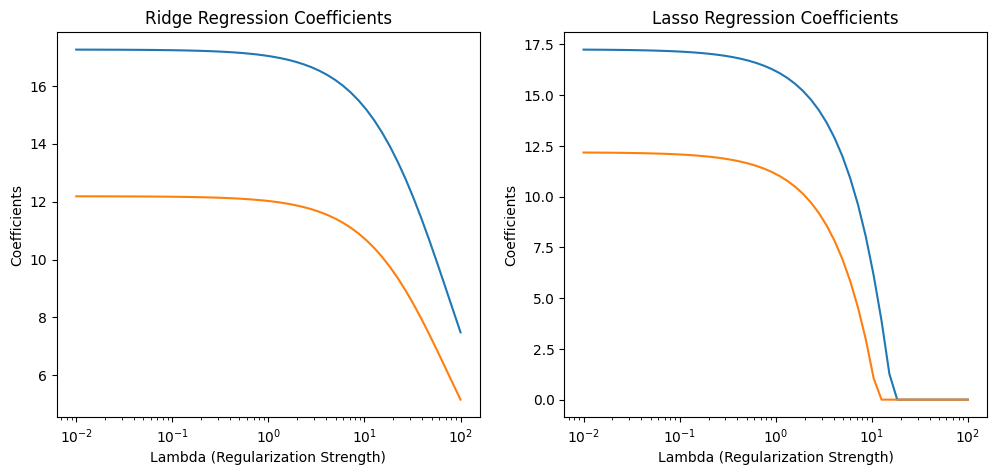

In [4]:
lambdas = np.logspace(-2, 2, 50)
ridge_coefs = []
lasso_coefs = []

for l in lambdas:
    ridge = Ridge(alpha=l)
    ridge.fit(X_train_scaled, y_train)
    ridge_coefs.append(ridge.coef_)

    lasso = Lasso(alpha=l)
    lasso.fit(X_train_scaled, y_train)
    lasso_coefs.append(lasso.coef_)

ridge_coefs = np.array(ridge_coefs)
lasso_coefs = np.array(lasso_coefs)

plt.figure(figsize=(12, 5))

# Ridge plot
plt.subplot(1, 2, 1)
plt.plot(lambdas, ridge_coefs)
plt.xscale('log')
plt.xlabel("Lambda (Regularization Strength)")
plt.ylabel("Coefficients")
plt.title("Ridge Regression Coefficients")

# Lasso plot
plt.subplot(1, 2, 2)
plt.plot(lambdas, lasso_coefs)
plt.xscale('log')
plt.xlabel("Lambda (Regularization Strength)")
plt.ylabel("Coefficients")
plt.title("Lasso Regression Coefficients")

plt.show()


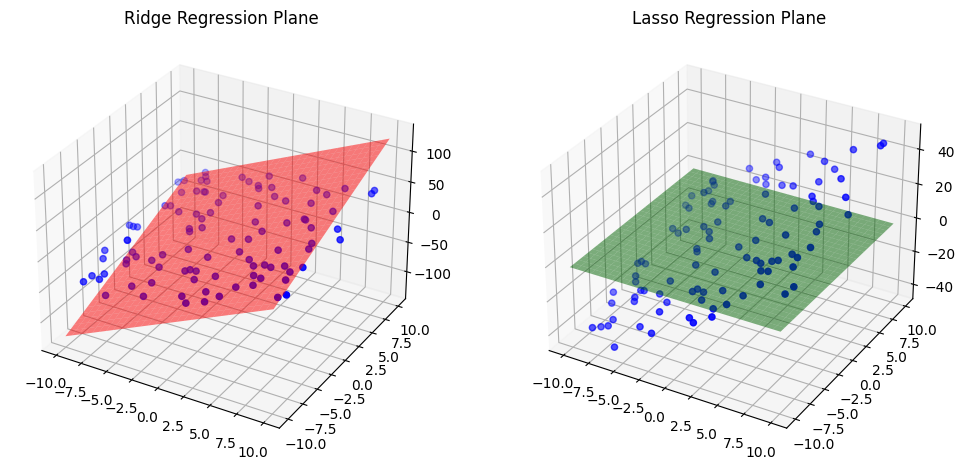

In [5]:
X_grid1, X_grid2 = np.meshgrid(np.linspace(-10, 10, 30), np.linspace(-10, 10, 30))
Z_ridge = ridge.coef_[0] * X_grid1 + ridge.coef_[1] * X_grid2 + ridge.intercept_
Z_lasso = lasso.coef_[0] * X_grid1 + lasso.coef_[1] * X_grid2 + lasso.intercept_

fig = plt.figure(figsize=(12, 6))

# Ridge Regression Surface
ax = fig.add_subplot(121, projection='3d')
ax.plot_surface(X_grid1, X_grid2, Z_ridge, alpha=0.5, color='r')
ax.scatter(df['X1'], df['X2'], df['y'], color='blue')
ax.set_title("Ridge Regression Plane")

# Lasso Regression Surface
ax = fig.add_subplot(122, projection='3d')
ax.plot_surface(X_grid1, X_grid2, Z_lasso, alpha=0.5, color='g')
ax.scatter(df['X1'], df['X2'], df['y'], color='blue')
ax.set_title("Lasso Regression Plane")

plt.show()
